In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
spotify_data = pd.read_csv('/content/drive/MyDrive/spotify.csv')

# Display the first few rows
spotify_data.head()


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [4]:
spotify_data.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [ ]:
#Q1-Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [5]:
import pandas as pd

# Check for null values
null_values = spotify_data.isnull().sum()
print("Null Values:\n", null_values)

# If there are null values, you can handle them by filling them or dropping them
# Example: Filling null values with a default value (e.g., 'Unknown' for strings or 0 for numeric columns)
spotify_data = spotify_data.fillna({'Artist': 'Unknown', 'Track Name': 'Unknown', 'Popularity': 0, 'Duration (ms)': 0, 'Track ID': 0})

# Or you could drop rows with null values (if applicable)
# spotify_data = spotify_data.dropna()

# Check for duplicate rows
duplicate_rows = spotify_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# If there are duplicates, you can remove them
spotify_data = spotify_data.drop_duplicates()

# Display the cleaned DataFrame
spotify_data.head()


Null Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of duplicate rows: 27


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


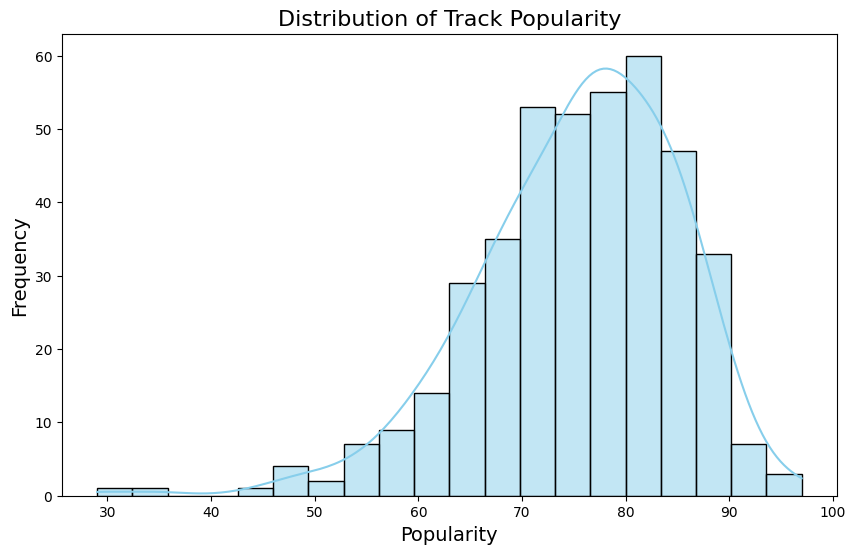

In [6]:
#Q2-What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of popularity
plt.figure(figsize=(10, 6))
sns.histplot(spotify_data['Popularity'], kde=True, bins=20, color='skyblue')

# Adding labels and title
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()


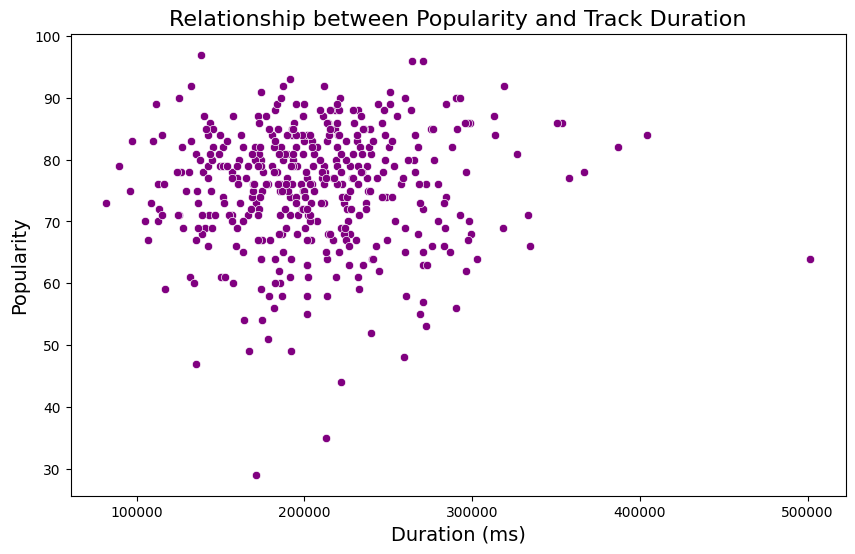

In [7]:
#Q3-Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

# Scatter plot to explore the relationship between popularity and duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x=spotify_data['Duration (ms)'], y=spotify_data['Popularity'], color='purple')

# Adding labels and title
plt.title('Relationship between Popularity and Track Duration', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

# Show the plot
plt.show()


<ipython-input-8-ebd0047bedc1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify_data, x='Artist', palette='Set2', order=spotify_data['Artist'].value_counts().index)


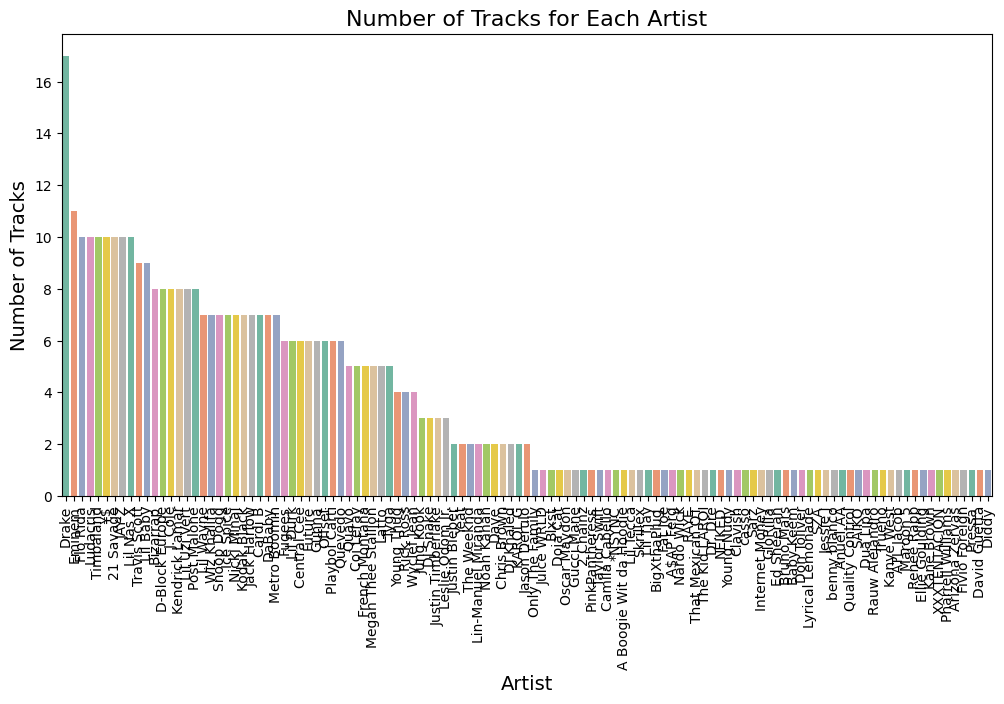

In [8]:
#Q4-Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot
# Countplot to show the number of tracks for each artist
plt.figure(figsize=(12, 6))
sns.countplot(data=spotify_data, x='Artist', palette='Set2', order=spotify_data['Artist'].value_counts().index)

# Adding labels and title
plt.title('Number of Tracks for Each Artist', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [9]:
#Q5-# Sort the dataset by popularity in ascending order and get the top 5 least popular tracks
least_popular_tracks = spotify_data.sort_values(by='Popularity').head(5)

# Display the artist name and track name for the least popular tracks
least_popular_tracks_info = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]
print(least_popular_tracks_info)


             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [10]:
#Q6-Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
# Get the top 5 most popular artists based on total popularity
top_5_artists = spotify_data.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5)

# Calculate the average popularity for each artist in the top 5
average_popularity = spotify_data[spotify_data['Artist'].isin(top_5_artists.index)] \
    .groupby('Artist')['Popularity'] \
    .mean() \
    .sort_values(ascending=False)

# Display the artist with the highest average popularity
print(average_popularity)


Artist
¥$           85.100000
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Name: Popularity, dtype: float64


In [11]:
#Q7-For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist
# Get the top 5 most popular artists based on total popularity
top_5_artists = spotify_data.groupby('Artist')['Popularity'].sum().sort_values(ascending=False).head(5)

# Find the most popular track for each of these top 5 artists
most_popular_tracks = []

for artist in top_5_artists.index:
    # Filter data for the artist and sort by popularity to get the most popular track
    artist_tracks = spotify_data[spotify_data['Artist'] == artist]
    most_popular_track = artist_tracks.sort_values(by='Popularity', ascending=False).iloc[0]

    # Append the artist name and the most popular track to the list
    most_popular_tracks.append((artist, most_popular_track['Track Name']))

# Display the result
for artist, track in most_popular_tracks:
    print(f"Artist: {artist}, Most Popular Track: {track}")


Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: ¥$, Most Popular Track: CARNIVAL
Artist: 21 Savage, Most Popular Track: redrum
Artist: Flo Rida, Most Popular Track: Low (feat. T-Pain)


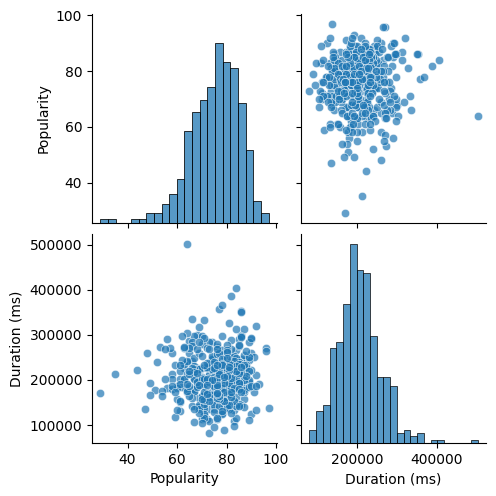

In [12]:
#Q8-# Import Seaborn for pair plot visualization
import seaborn as sns

# Select numerical columns for the pair plot (Populatity and Duration (ms) are obvious ones)
numerical_data = spotify_data[['Popularity', 'Duration (ms)']]

# Plot the pair plot
sns.pairplot(numerical_data, diag_kind='hist', plot_kws={'alpha':0.7})

# Show the plot
plt.show()


<ipython-input-13-6dec35a66561>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=spotify_data, x='Artist', y='Duration (ms)', palette='Set2')


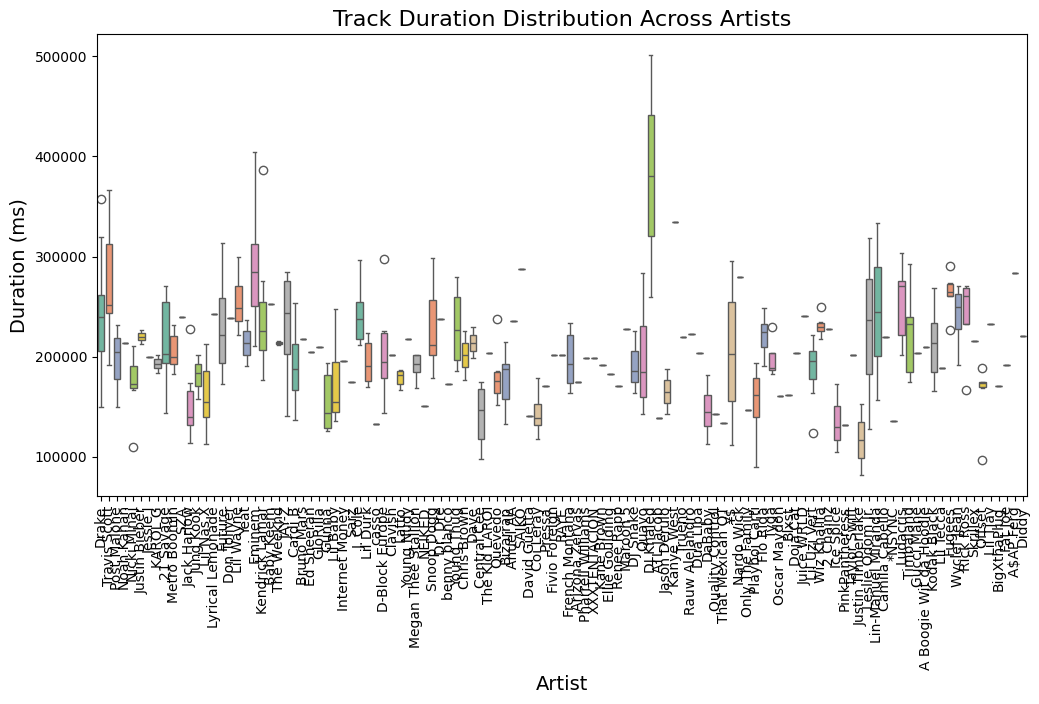

In [13]:
#Q9-Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot
# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to visualize the distribution of track durations across different artists
plt.figure(figsize=(12, 6))
sns.boxplot(data=spotify_data, x='Artist', y='Duration (ms)', palette='Set2')

# Adding labels and title
plt.title('Track Duration Distribution Across Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Duration (ms)', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


<ipython-input-14-4981ee9aee34>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=spotify_data, x='Artist', y='Popularity', palette='Set2')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/

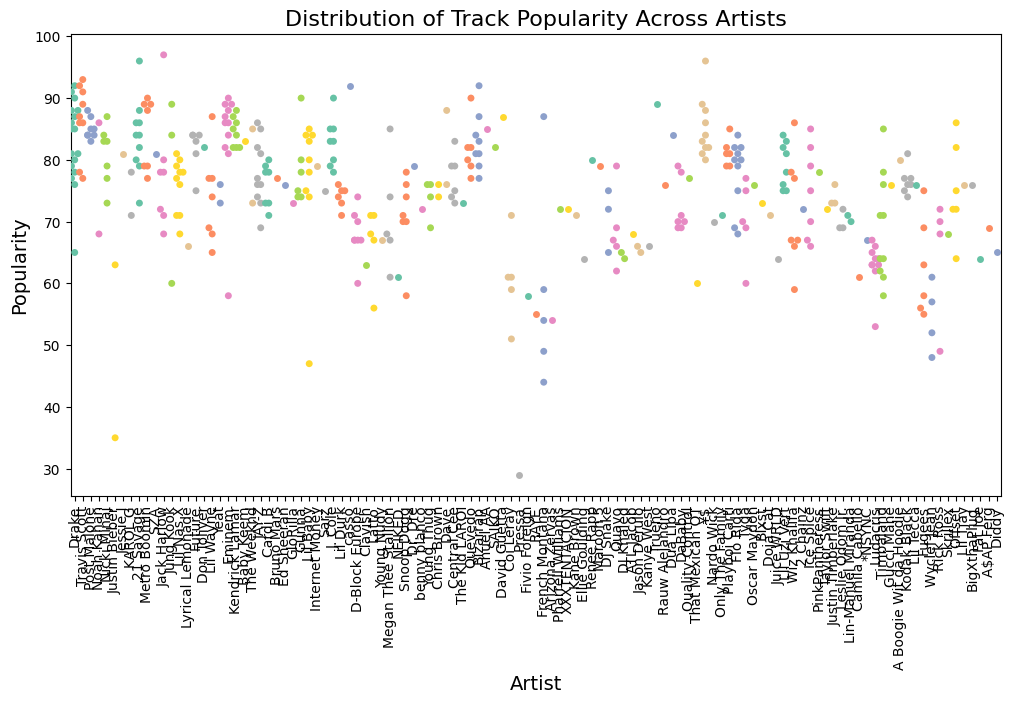

In [14]:
#Q10-How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

# Import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot to visualize the distribution of track popularity across different artists
plt.figure(figsize=(12, 6))
sns.swarmplot(data=spotify_data, x='Artist', y='Popularity', palette='Set2')

# Adding labels and title
plt.title('Distribution of Track Popularity Across Artists', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Popularity', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()
